Train Model

In [7]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
dataset = './keypoint_train.csv'
NUM_CLASSES = 28
RANDOM_SEED = 42

preparazione dei dati

In [9]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

struttura modello

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_3 (Dropout)         (None, 42)                0         
                                                                 
 dense_4 (Dense)             (None, 20)                860       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 28)               

In [11]:
test_size = X_train.shape[0]
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

addestramento modello

In [12]:
history=model.fit(
    X_train,
    y_train,
    epochs=600,
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/600
296/296 [==============================] - 1s 4ms/step - loss: 2.7833 - accuracy: 0.1588 - val_loss: 1.8342 - val_accuracy: 0.4893
Epoch 2/600
296/296 [==============================] - 1s 3ms/step - loss: 1.9315 - accuracy: 0.3310 - val_loss: 1.2878 - val_accuracy: 0.6585
Epoch 3/600
296/296 [==============================] - 1s 3ms/step - loss: 1.6426 - accuracy: 0.4056 - val_loss: 1.1073 - val_accuracy: 0.6910
Epoch 4/600
296/296 [==============================] - 1s 3ms/step - loss: 1.5170 - accuracy: 0.4461 - val_loss: 1.0021 - val_accuracy: 0.7359
Epoch 5/600
296/296 [==============================] - 1s 3ms/step - loss: 1.4318 - accuracy: 0.4751 - val_loss: 0.9213 - val_accuracy: 0.7717
Epoch 6/600
296/296 [==============================] - 1s 3ms/step - loss: 1.3624 - accuracy: 0.5015 - val_loss: 0.8780 - val_accuracy: 0.7764
Epoch 7/600
296/296 [==============================] - 1s 3ms/step - loss: 1.3080 - accuracy: 0.5203 - val_loss: 0.8339 - val_accuracy: 0.7859

In [13]:
model.save("./model.hdf5")

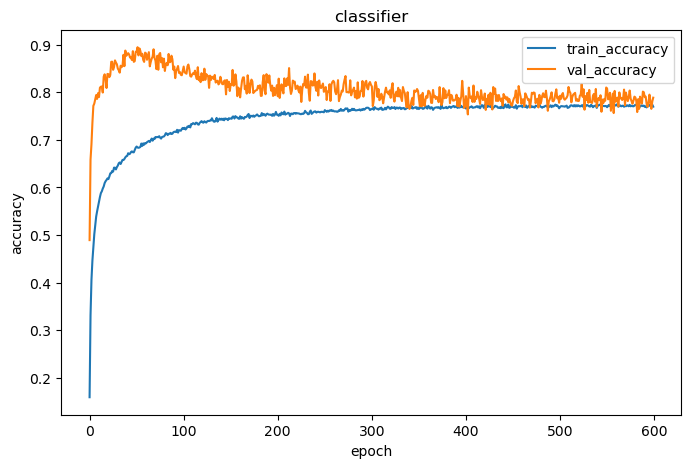

In [14]:
plt.figure(figsize=(8,5))

plt.plot(history.history['accuracy'], label='train_accuracy',)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title("classifier")

plt.show()